## Testing if the wedge exhumation model works & makes sense:

The derivations in the [wedge_exhumation_derivation_equations.ipynb](wedge_exhumation_derivation_equations.ipynb) notebook resulted in a series of equations for the velocity and position of particless in a wedge that undergoes horizontal compression. 

*Note that these equations describe the velocity of particles in the wedge due to compression only. The velocities due to the transport of the wedge along the basal detachment still need to be added and included in the integration of particle positions.*

The equations for velocity are:

$$\dfrac{\partial x}{\partial t} = \dfrac{x}{L}v_c$$

where x is horizontal position, t is time, L is the width of the wedge, and v_C is the compressional velcotiy of the right hand side of the wedge

a simplified solution in which vy=0 at the bottom of the wedge
$$v_y = -\dfrac{2 (y- (\beta x))}{L} v_c$$

where y is the elevation of the particle.

which results in particle trajectories that are not parallel to the bottom of the wedge.

THe correct solution that does not use this assumption is:
$$v_y = \dfrac{v_c}{L} \left( (-2 - \dfrac{\beta}{\alpha - \beta}) y + (2 \beta + \dfrac{\alpha \beta}{\alpha - \beta}) x \right)$$

where alpha is the slope of the surface, and beta is the slope of the bottom of the wedge (m/m)

For the position of particles this yields:

For the x coordinate:

$$x = x_0 e^{v_c t /L}$$

where x0 is the position of the particle at t=0

a simplfied solution in which vy is assumed to be independent of x:

$$y = ((\alpha - \beta) x) e^{-2 v_c t /L} + \beta x$$

where y equals the elevation of the surface at t=0. This is implemented in the function ``y_position_over_time_simple`` and has been verified by comparison with the numerical solution.


and the full solution for y
$$y = - \dfrac{\beta (3 \alpha - 2 \beta)}{2 \alpha - \beta} x_0 e^{(v_c/L) t}$$

However, this is incorrect and gives nonsensical results that do not match the numerical solution at all.


## Import modules

In [66]:
import string
import numpy as np
import matplotlib.pyplot as pl

year = 365.25 * 24 * 3600

## Some parameters

In [67]:
# compressional velocity
vc = -50e3 / 50e6

# lenght of wedge
L = 200e3

# slope of topography (m/m)
alpha = 0.05

# slope of bottom of wedge (m/m)
beta = -0.1

# 
n_rows = 100

## Parameters for particle position over time

In [68]:
# x-coordinates of starting points:
x0s = np.arange(0, L+1e4, 1e4)

# timesteps (years)
t = np.linspace(0, -1e8, 10001)

print('particle starting points: ', x0s)

print('timesteps (Myr): ', t / 1e6)

particle starting points:  [     0.  10000.  20000.  30000.  40000.  50000.  60000.  70000.  80000.
  90000. 100000. 110000. 120000. 130000. 140000. 150000. 160000. 170000.
 180000. 190000. 200000.]
timesteps (Myr):  [ 0.000e+00 -1.000e-02 -2.000e-02 ... -9.998e+01 -9.999e+01 -1.000e+02]


## Set up functions to calculate particle velocities in wedge:

In [69]:
def velocity(xs, ys, beta, L, vc):
    
    vx = xs / L * vc
    vy = -2 * (ys - beta * xs) / (L) * vc
    
    return vx, vy


def velocity_better(xs, ys, alpha, beta, L, vc):
    
    gamma = alpha - beta
    
    vx = xs / L * vc
    
    vy = vc / L * ( (-2 - (beta / (alpha - beta)) ) * ys + (2 * beta + (alpha * beta)/(alpha - beta)) * xs)

    return vx, vy

## Functions to calculate particle position over time

In [71]:
np.exp(1)

2.718281828459045

## set up geometry of wedge

In [72]:
xcoords = np.linspace(0, L, 101)
y_top = xcoords * alpha
y_bottom = xcoords * beta

H = y_top.max() - y_bottom.min()

print('with the chosen slopes of land surface and wedge bottom/detachment the max height of '
      'the wedge is : ', H / 1e3, ' km')

ys = np.zeros((len(xcoords), n_rows))
xs = np.zeros_like(ys)
ybs = np.zeros_like(ys)

for i in range(len(xcoords)):
    ys[i, :] = np.linspace(y_bottom[i], y_top[i], n_rows)
    xs[i, :] = xcoords[i]
    ybs[i, :] = y_bottom[i]

with the chosen slopes of land surface and wedge bottom/detachment the max height of the wedge is :  30.0  km


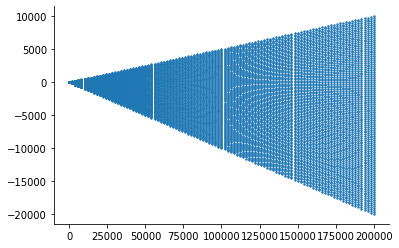

In [73]:
fig,ax = pl.subplots(1, 1)
ax.scatter(xs, ys, s=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Fig caption** *Shape of the wedge and numerical grid*

## Check the calculated velocities due to compression

/Users/elcopone/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


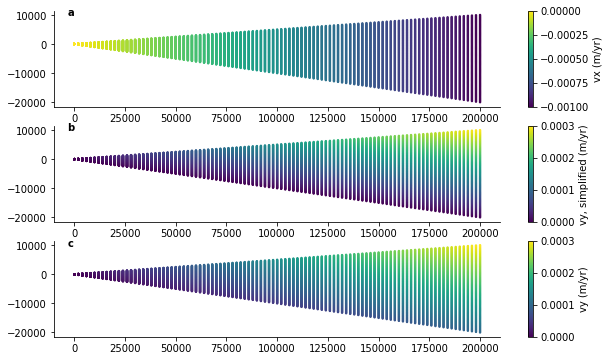

In [74]:
# calculate velocities:
vx_simple, vy_simple = velocity(xs, ys, beta, L, vc)

vx, vy = velocity_better(xs, ys, alpha, beta, L, vc)

#double check
vyt = 2 * H / L**2 * xs * vc

h = xs / L * H

#vytc = h / (ys - ybs) * vy

vyc = (ys - ybs) / h * vyt

fig, axs = pl.subplots(3, 1, figsize=(10, 6))

cb1 = axs[0].scatter(xs, ys, c=vx, s=2)
cb = fig.colorbar(cb1, ax=axs[0])
cb.set_label('vx (m/yr)')

cb3 = axs[1].scatter(xs, ys, c=vy_simple, s=2)
cb = fig.colorbar(cb3, ax=axs[1])
cb.set_label('vy, simplified (m/yr)')

cb2 = axs[2].scatter(xs, ys, c=vy, s=2)
cb = fig.colorbar(cb2, ax=axs[2])
cb.set_label('vy (m/yr)')

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')

**Fig. caption** *Calculated horizontal and vertical velocties in a wegde that undergoes horizontal compression. a) horizontal velcotiy, b) simplified vertical velocity, where the vertical velcotity is assumed to be zero at the bottom of the wedge, and c) the correct solution for vertical velocity*

## Check if calculated velocity fullfills criteria

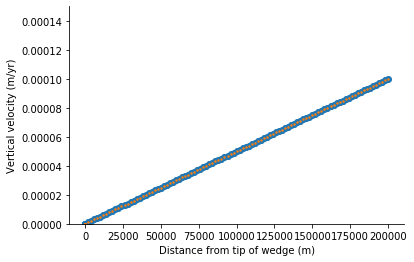

In [75]:
ind_bottom = ys == ybs

fig, ax = pl.subplots(1, 1)

ax.scatter(xs[ind_bottom], vx[ind_bottom] * beta)
ax.scatter(xs[ind_bottom], vy[ind_bottom], s=2)

ax.set_ylim(0, vy[ind_bottom].max() * 1.5)

ax.set_xlabel('Distance from tip of wedge (m)')
ax.set_ylabel('Vertical velocity (m/yr)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


**Fig caption** *Double check to see if the calculated vertical velocity at the base (small dots) is equal to the expected value (big dots)*

## Show flowlines

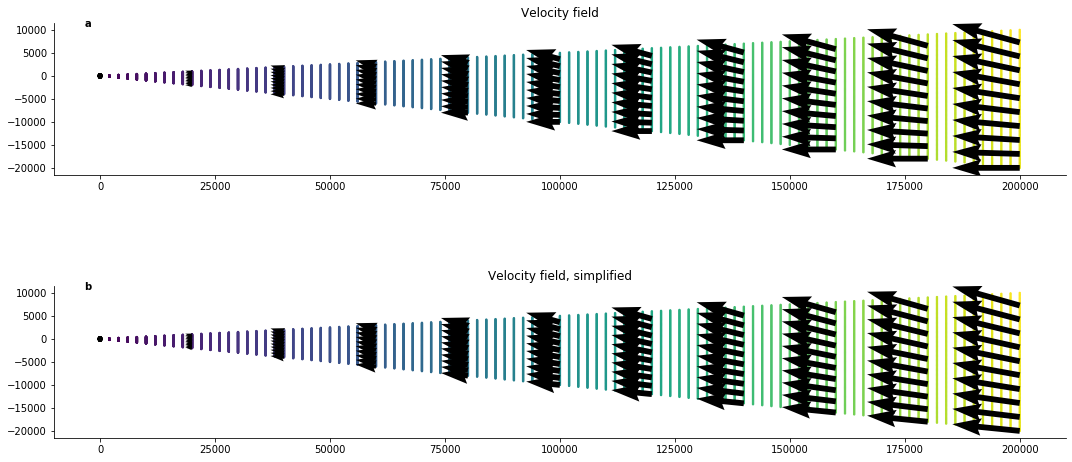

In [76]:
arrow_int = 10

v = np.sqrt(vx**2 + vy**2)

fig, axs = pl.subplots(2, 1, figsize=(15, 8))

for ax, vxi, vyi in zip(axs, [vx_simple, vx], [vy_simple, vy]):

    ax.scatter(xs, ys, c=v, s=2)
    ax.quiver(xs[::arrow_int, ::arrow_int], 
              ys[::arrow_int, ::arrow_int], 
              vxi[::arrow_int, ::arrow_int], 
              vyi[::arrow_int, ::arrow_int], scale=1.5e-2)

    ax.set_aspect('equal')

axs[0].set_title('Velocity field')
axs[1].set_title('Velocity field, simplified')

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
fig.tight_layout()

**Fig caption** *Particle velocity vectors in the wedge for a) the simplified solution with a zero vertical velocity at the bottom of the wedge and b) the correct solution*

## Function for particle x position over time

Following this equation:

$$x = x_0 e^{v_c t /L}$$

In [ ]:
def x_over_time(x0, vc, t, L):
    '''
    Horizontal position (x) over time (t)
    '''
    
    xh = x0 * np.exp((vc*t/L))
    
    return xh


## Test integration of x

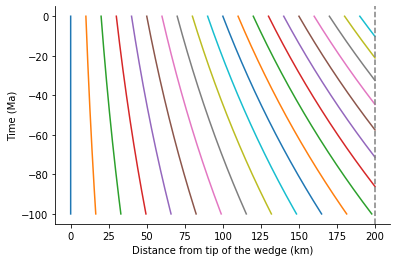

In [77]:
xp = np.array([x_over_time(x0, vc, t, L) for x0 in x0s])

# elimnate values outside the wedge
xp[xp>L] = np.nan

fig, ax = pl.subplots(1, 1)
for xi in xp:
    ax.plot(xi / 1e3, t / 1e6)

# show edge of the wedge
ax.axvline(x=L/1e3, color='gray', ls='--')

ax.set_xlabel('Distance from tip of the wedge (km)')
ax.set_ylabel('Time (Ma)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


**Fig caption** *Calculated horizontal position of particles over time in a stationary wedge undergoing compression*

## Set up functions for particle elevation over time:

Simplified solution in which vy is assumed to be independent of x:

$$y = ((\alpha - \beta) x) e^{-2 v_c t /L} + \beta x$$

Full solution, which however appears not to be correct (see comparison with numerical solution below):

$$y = - \dfrac{\beta (3 \alpha - 2 \beta)}{2 \alpha - \beta} x_0 e^{(v_c/L) t}$$

Which was derived by integrating the vertical velocity function (which is correct, see tests above):

$$v_y = \dfrac{v_c}{L} \left( (-2 - \dfrac{\beta}{\alpha - \beta}) y + (2 \beta + \dfrac{\alpha \beta}{\alpha - \beta}) x \right)$$

In [78]:
def y_position_over_time_simple(t, x, alpha, beta, vc, L):
    
    yloc = (alpha - beta) * x * np.exp(-2 * vc * t / L) + beta * x
    
    return yloc


def y_position_over_time(t, x0, alpha, beta, vc, L):
    
    #yloc = 2 * beta * x0 * np.exp(vc * t / L) + (alpha * x0 - 2 * beta * x0) * np.exp(2 * vc * t /L)
    yloc = - beta * (3 * alpha - 2 * beta) / (2 * alpha - beta) * x0 * np.exp(vc / L * t)
    
    return yloc


def y_position_over_time_v2(t, x0, alpha, beta, vc, L):
    
    
    # solution in wolfram alpha to full y velocity eq.:
    #y = b * np.exp(c * t) / (c * np.log10(np.exp(1)) - a) + k1 * a * t
    
    # difficult to find a bnd condition.....
    # y = yt at t=0 -> k1 = 0
    
    C1 = vc / L * (-2 * (beta / (alpha - beta)))
    
    C2 = vc / L * (2 * beta + (alpha * beta / (alpha-beta)))
    
    C3 = C2 * x0
    
    C4 = vc/L
    
    a = C1
    
    b = C3
    
    c = C4
    
    y = b * np.exp(c * t) / (c * np.log10(np.exp(1)) - a)
    
    return y
    



## Testing the integration of y over time:

In [79]:
x0 = 1e4
yl = y_position_over_time(t, x0, alpha, beta, vc, L)

#x0s = np.arange(0, L+1e4, 1e4)
#t = np.linspace(0, -1e8, 101)

yp = np.array([y_position_over_time(t, x0, alpha, beta, vc, L) for x0 in x0s])
yp2 = np.array([y_position_over_time(t, x0, alpha, beta, vc, L) for x0 in x0s])

yp_simple = np.array([y_position_over_time_simple(t, x0, alpha, beta, vc, L) for x0 in x0s])

xyp_num = np.array([numerical_particle_trajectory(t, x0, alpha, beta, L, vc) for x0 in x0s])

xyp_num_simple = np.array([numerical_particle_trajectory(t, x0, alpha, beta, L, vc, simple_method=True) 
                           for x0 in x0s])

xp_num, yp_num = xyp_num[:, 0], xyp_num[:, 1]

xp_num_simple, yp_num_simple = xyp_num_simple[:, 0], xyp_num_simple[:, 1]

In [80]:
d = yp - yp2

## Make a figure of vertical position particles:

/Users/elcopone/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


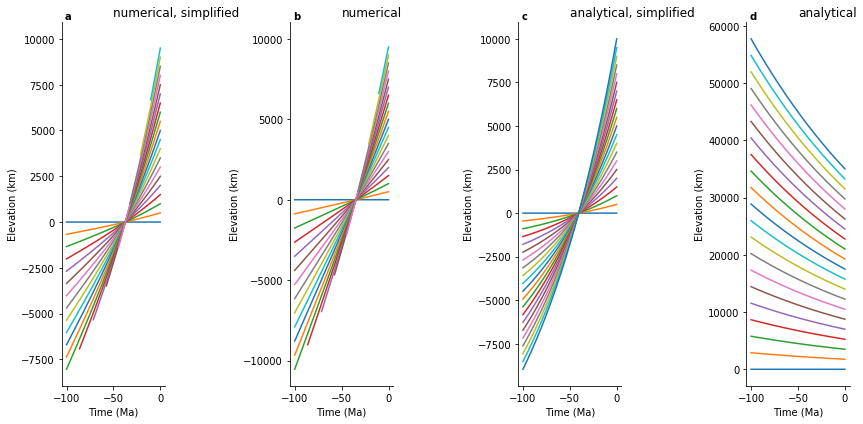

In [81]:
labels = ['numerical, simplified', 'numerical', 'analytical, simplified', 'analytical']

fig, axs = pl.subplots(1, 4, figsize=(12, 6))

for ax, xpi, ypi in zip(axs, [xp_num_simple, xp_num, xp, xp], [yp_num_simple, yp_num, yp_simple, yp]):
    
    ind = xpi > L
    ypi[ind] = np.nan
    
    for xpii, ypii in zip(xpi, ypi):
        ax.plot(t/1e6, ypii)

for ax in axs:
    ax.set_xlabel('Time (Ma)')
    ax.set_ylabel('Elevation (km)')

for ax, label in zip(axs, labels):
    ax.set_title(label, ha='left')

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
fig.tight_layout()

**Fig. caption** *Calculated vertical particle positions over time for a) the simplified numerical model, b) the full numerical solution, c) the simplified analytical solution, where vy is assumed to be independent of vxq and d) the full analytical solution. b and d should match ideally.....*

## Plot trajectories over time

/Users/elcopone/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


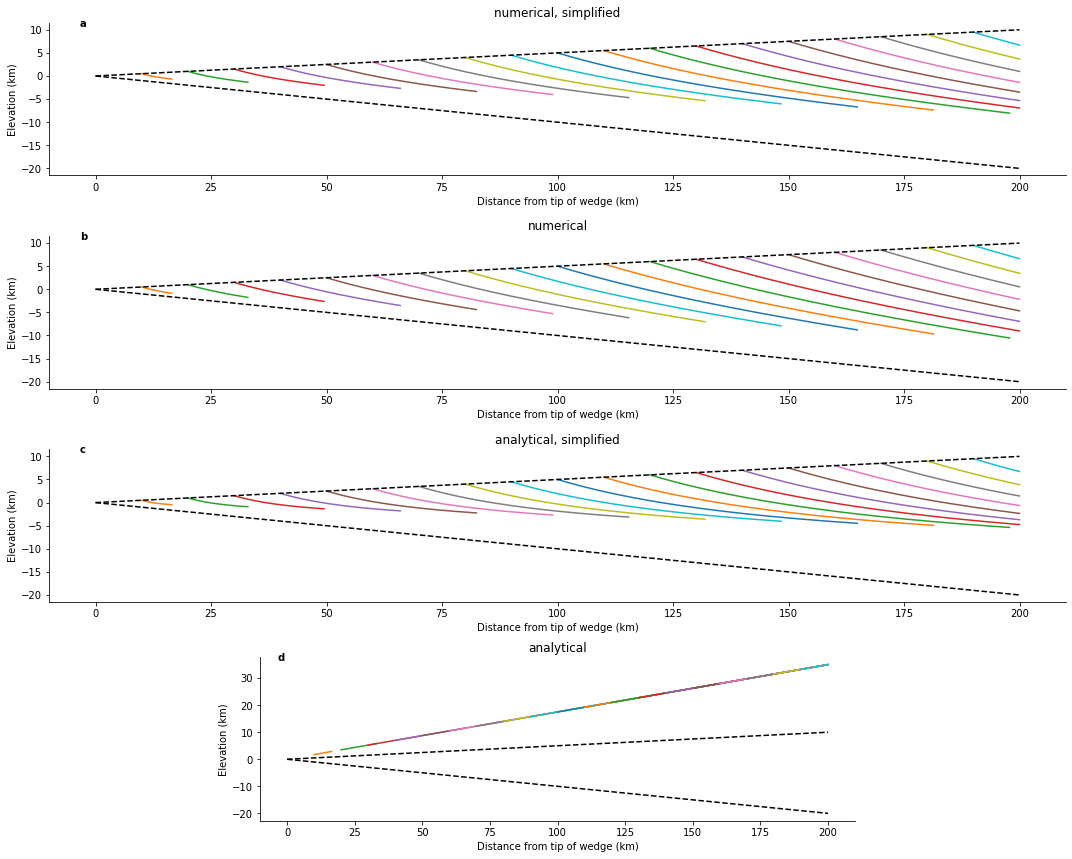

In [82]:
fig, axs = pl.subplots(4, 1, figsize=(15, 12))


for ax, xpi, ypi, label in zip(axs, [xp_num_simple, xp_num, xp, xp], 
                               [yp_num_simple, yp_num, yp_simple, yp], labels):
    
    ind = xpi > L
    xpi[ind] = np.nan
    ypi[ind] = np.nan
    
    for xl, yl in zip(xpi, ypi):
        leg_traj, = ax.plot(xl / 1e3, yl / 1e3)

    nt = xpi.shape[1]

    for nti in range(0, nt, 10):
        #leg_ts =  ax.scatter(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, s=20, color='black')
        #leg_tsl, =  ax.plot(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, color='gray', ls=':')
        pass
    
    leg_bnd, = ax.plot(xcoords / 1e3, y_top / 1e3, color='black', ls='--', lw=1.5)
    ax.plot(xcoords / 1e3, y_bottom / 1e3, color='black', ls='--', lw=1.5)
    
    ax.set_title(label)

for i, ax in enumerate(axs):
    ax.set_xlabel('Distance from tip of wedge (km)')
    ax.set_ylabel('Elevation (km)')

    ax.set_aspect('equal')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
#fig.legend([leg_traj, leg_tsl, leg_bnd], 
#          ['particle trajectories', 'Timesteps', 'Isochron', 'Wedge boundaries'], 
#          loc='lower center', ncol=2)

fig.tight_layout()

**Fig caption** *From top to bottom: a) numerical solution for particle trajectories in a wedge that undergoes horizontal compression and vertical expansion. This is the simplified solution where the veritcal velocity at the bottom of the wedge is assumed zero (and not parallel to the bottom of the wedge) b) Numerical solution, but with correct term for the vertical velocity c) analytical solution, simplified with the assumption that vertical velocity is inbdependent of horizontal position (x) d) full analytical solution without any additional simplifications.*